In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('AirlineData.csv')

In [4]:
df.head(3)

,Airline,Source,Destination,Number of Stops,Class,Date,Total_Stopover_Time,price in CAD,days_left,Departure_24hr,Arrival_24hr,Arrival_Day_Offset
0,Etihad Airways,Toronto Pearson Intl,Bengaluru Intl,1,Economy Class,2024-06-02,130,2340.0,1,22:10,03:05,2
1,Delta,Toronto Pearson Intl,Bengaluru Intl,1,Economy Class,2024-06-02,1335,1347.0,1,22:40,23:15,2
2,Multiple Airlines,Toronto Pearson Intl,Bengaluru Intl,2,Economy Class,2024-06-02,420,1934.0,1,21:20,07:45,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384663 entries, 0 to 384662
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Airline              384663 non-null  object 
 1   Source               384663 non-null  object 
 2   Destination          384663 non-null  object 
 3   Number of Stops      384663 non-null  int64  
 4   Class                384663 non-null  object 
 5   Date                 384663 non-null  object 
 6   Total_Stopover_Time  384663 non-null  int64  
 7   price in CAD         384663 non-null  float64
 8   days_left            384663 non-null  int64  
 9   Departure_24hr       384663 non-null  object 
 10  Arrival_24hr         384663 non-null  object 
 11  Arrival_Day_Offset   384663 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 35.2+ MB


##Most flights in the dataset have 1 or 2 stops, while direct flights (0 stops) and flights with 3 stops are less common.
Travelers might prefer flights with fewer stops to minimize travel time and potential delays, which could be a reason for the higher frequency of 1 or 2 stop flights.##

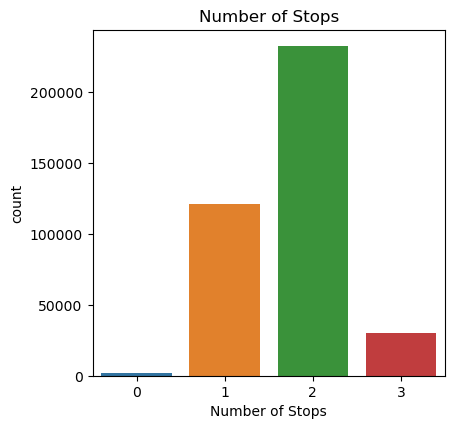

In [6]:
# Number of Stops
plt.figure(figsize=(12, 8)) 
plt.subplot(2, 3, 1)
sns.countplot(x='Number of Stops', data=df)
plt.title('Number of Stops')
plt.tight_layout()
plt.show()


The plot below shows likely shows the economy class has the highest count, indicating it is the preferred choice for most travelers. Business class and any other premium classes with lower counts represents a smaller segment of the market.

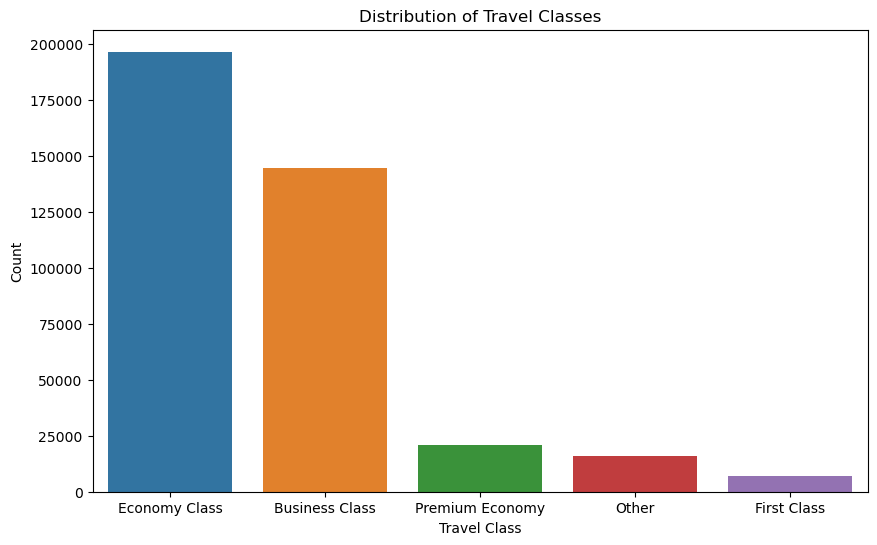

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df, order=df['Class'].value_counts().index)
plt.title('Distribution of Travel Classes')
plt.xlabel('Travel Class')
plt.ylabel('Count')
plt.show()

The majority of stopover times are on the shorter side, but there aresome long stopovers that skew the distribution to the right.
Implications: Longer stopovers might be less desirable for travelers, possibly leading to lower prices for such flights to compensate for the inconvenience.

Text(0.5, 1.0, 'Total Stopover Time Distribution')

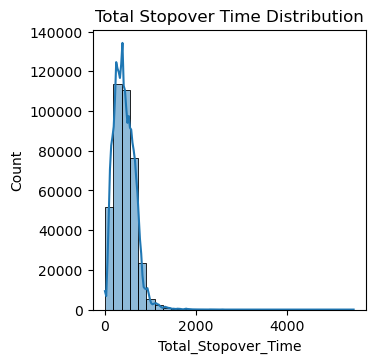

In [8]:
plt.figure(figsize=(12, 8)) 
plt.subplot(2, 3, 2)
sns.histplot(df['Total_Stopover_Time'], kde=True, bins=30)
plt.title('Total Stopover Time Distribution')

Flight prices exhibit a right-skewed distribution, with most flights priced moderately and a few outliers with very high prices.
Various factors like travel class, airline reputation, and booking timing can influence these prices, leading to significant variation.

Text(0.5, 1.0, 'Price Distribution in CAD')

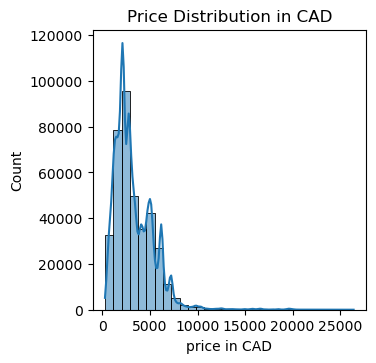

In [9]:
plt.figure(figsize=(12, 8)) 
plt.subplot(2, 3, 3)
sns.histplot(df['price in CAD'], kde=True, bins=30)
plt.title('Price Distribution in CAD')

The days left before the journey shows a relatively uniform distribution, indicating that the dataset includes a mix of bookings made well in advance and those made closer to the departure date. Understanding booking patterns can help airlines optimize pricing strategies and marketing efforts.

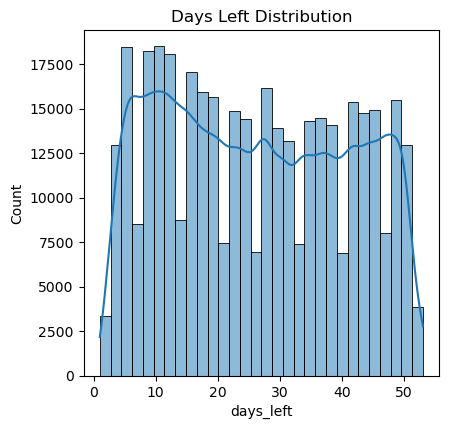

In [14]:
plt.figure(figsize=(12, 8)) 
plt.subplot(2, 3, 4)
sns.histplot(df['days_left'], kde=True, bins=30)
plt.title('Days Left Distribution')
plt.tight_layout()
plt.show()

In [ ]:
Peaks are observed late evening (6-9 PM), suggesting these are popular times for flights.


C:\Users\COMFORT\AppData\Local\Temp\ipykernel_24076\1663750265.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  departure_hours = pd.to_datetime(df['Departure_24hr']).dt.hour


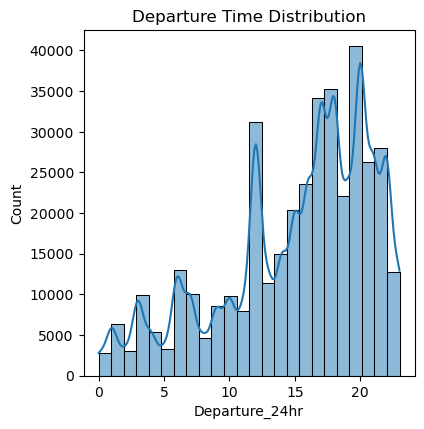

In [15]:
departure_hours = pd.to_datetime(df['Departure_24hr']).dt.hour
plt.figure(figsize=(12, 8)) 
plt.subplot(2, 3, 5)
sns.histplot(departure_hours, kde=True, bins=24)
plt.title('Departure Time Distribution')
plt.tight_layout()
plt.show()


Popular departure and arrival times might correspond to traveler preferences for starting their journey early or arriving at their destination in the evening.

C:\Users\COMFORT\AppData\Local\Temp\ipykernel_24076\2267608639.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  arrival_hours = pd.to_datetime(df['Arrival_24hr']).dt.hour


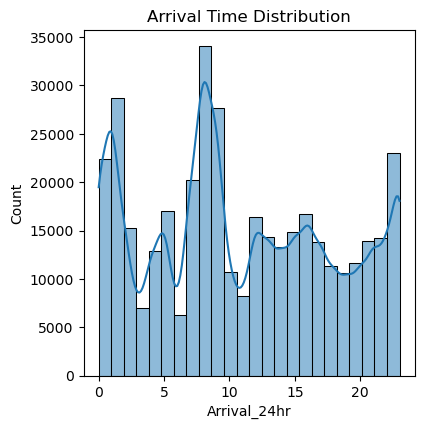

In [17]:
# Arrival Time (converted to numeric hour for plotting)
plt.figure(figsize=(12, 8))
arrival_hours = pd.to_datetime(df['Arrival_24hr']).dt.hour
plt.subplot(2, 3, 6)
sns.histplot(arrival_hours, kde=True, bins=24)
plt.title('Arrival Time Distribution')
plt.tight_layout()
plt.show()

The plot below shows that certain airlines have a higher number of flights in the dataset, possibly indicating their larger market presence or more extensive flight networks.
Airline reputation, service quality, and flight routes can influence ticket prices and traveler preferences.

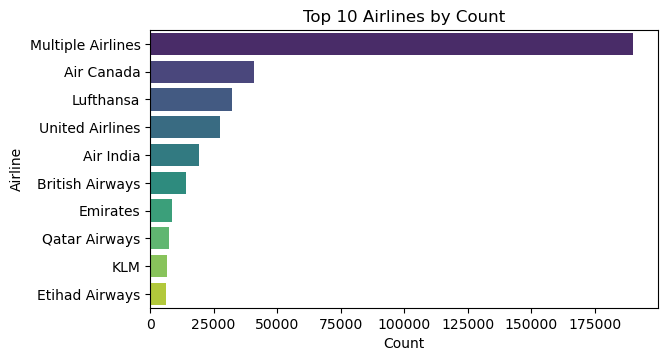

In [33]:
top_10_airlines = df['Airline'].value_counts().head(10)
plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 1)
sns.countplot(y=df[df['Airline'].isin(top_10_airlines.index)]['Airline'], order=top_10_airlines.index, palette='viridis')
plt.title('Top 10 Airlines by Count')
plt.xlabel('Count')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()




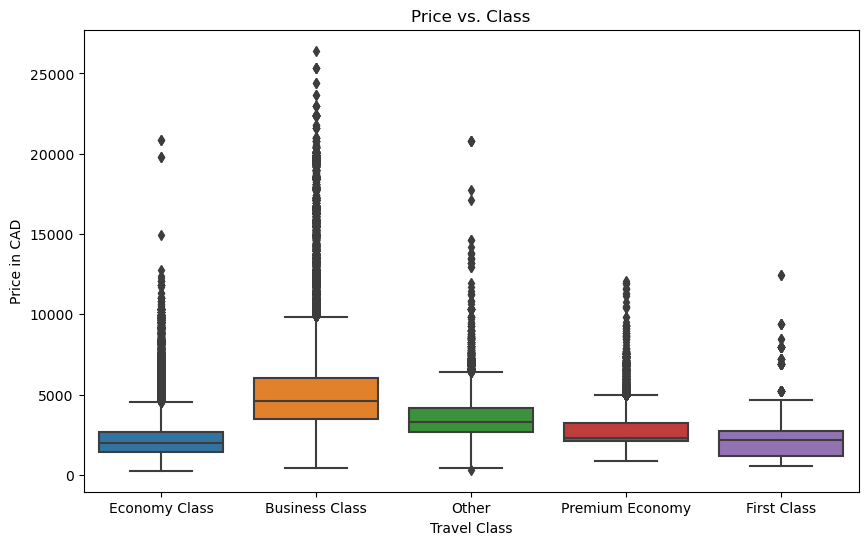

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='price in CAD', data=df)
plt.title('Price vs. Class')
plt.xlabel('Travel Class')
plt.ylabel('Price in CAD')
plt.show()


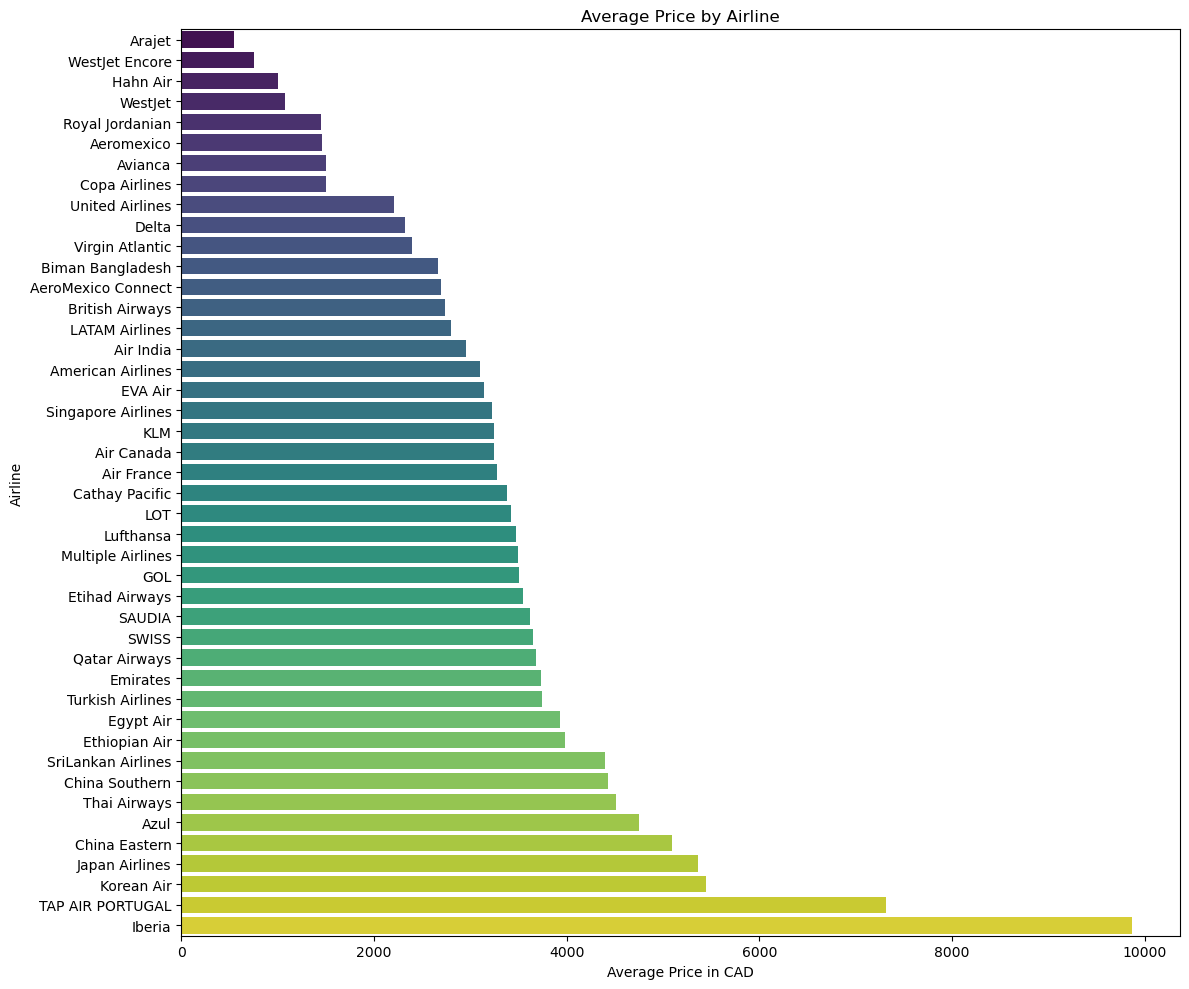

In [34]:
average_price_per_airline = df.groupby('Airline')['price in CAD'].mean().sort_values()
plt.figure(figsize=(12, 10))
sns.barplot(x=average_price_per_airline.values, y=average_price_per_airline.index, palette='viridis')
plt.title('Average Price by Airline')
plt.xlabel('Average Price in CAD')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()



Some cities are more frequent sources or destinations of flights, indicating popular travel routes.
Factors such as demand, distance, and city-specific costs can impact flight prices. Popular travel hubs might have higher average prices due to higher demand.

Text(0.5, 1.0, 'Source City Count')

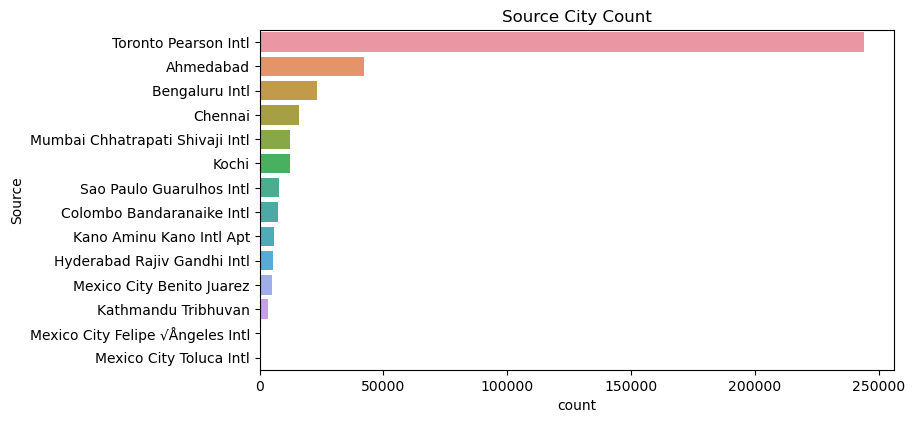

In [30]:
plt.figure(figsize=(18, 15))
plt.subplot(3, 2, 3)
sns.countplot(y='Source', data=df, order=df['Source'].value_counts().index)
plt.title('Source City Count')






Text(0.5, 1.0, 'Price Distribution by Source City')

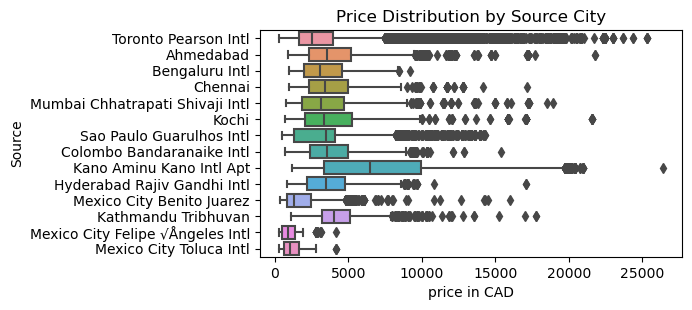

In [35]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 4)
sns.boxplot(x='price in CAD', y='Source', data=df, order=df['Source'].value_counts().index)
plt.title('Price Distribution by Source City')

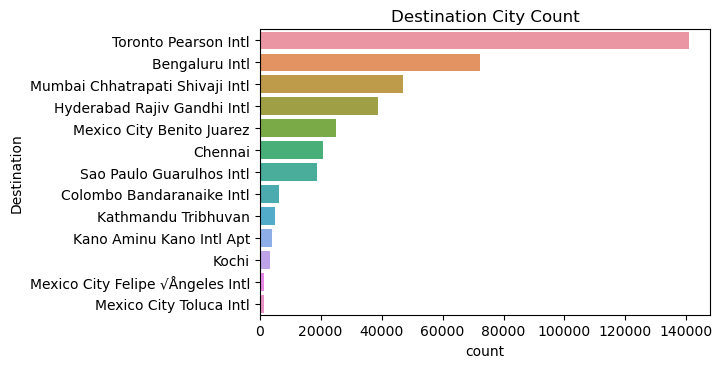

In [37]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 5)
sns.countplot(y='Destination', data=df, order=df['Destination'].value_counts().index)
plt.title('Destination City Count')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Price Distribution by Destination City')

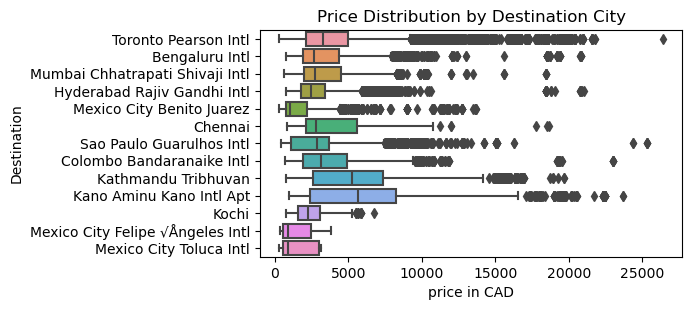

In [39]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 6)
sns.boxplot(x='price in CAD', y='Destination', data=df, order=df['Destination'].value_counts().index)
plt.title('Price Distribution by Destination City')


In [ ]:
More stops generally mean longer total stopover times.

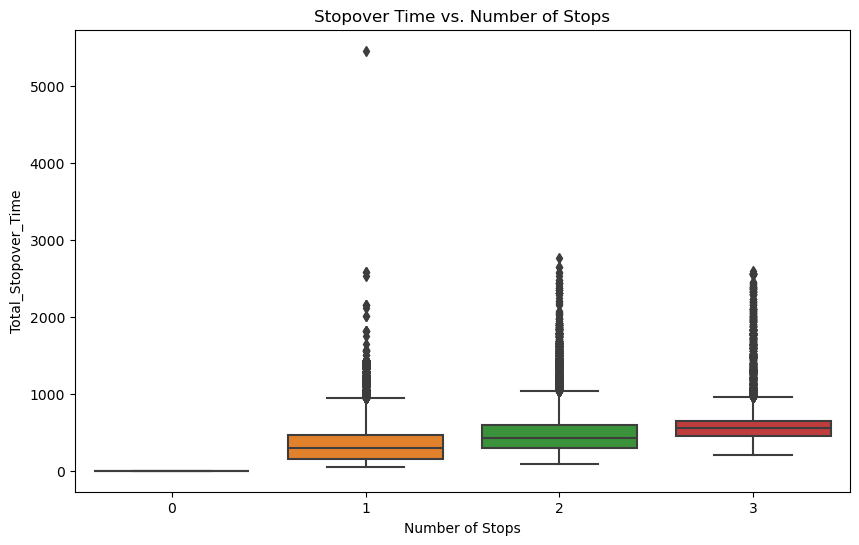

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number of Stops', y='Total_Stopover_Time', data=df)
plt.title('Stopover Time vs. Number of Stops')
plt.show()


In [ ]:
Prices may increase as the departure date approaches, indicating last-minute bookings tend to be more expensive.

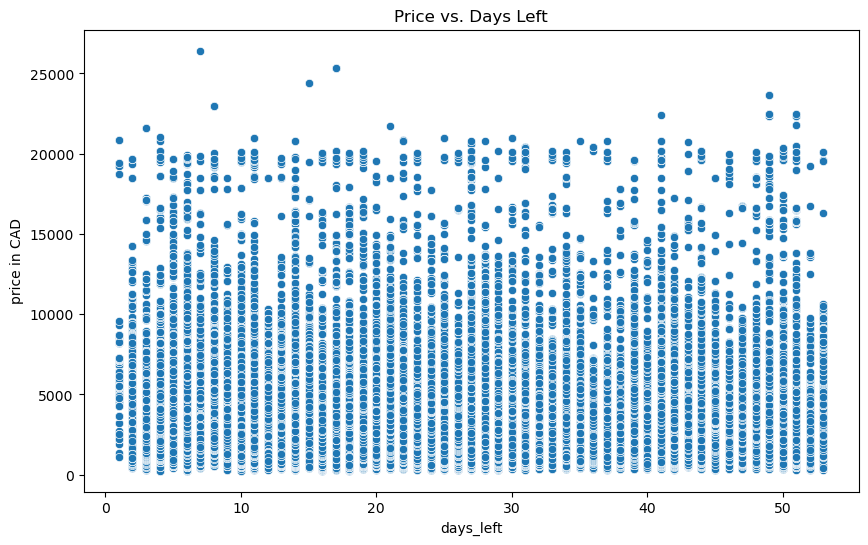

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='days_left', y='price in CAD', data=df)
plt.title('Price vs. Days Left')
plt.show()


The median price increases from Economy to First Class, reflecting the expected cost differences between these classes.
Economy and First Class have more outliers, suggesting that some flights in these classes can be significantly more expensive than the typical range):
The IQR is widest for Business and First Class, indicating greater variability in prices within these classes. Economy and Premium Economy have narrower IQRs, suggesting more consistent pricing.

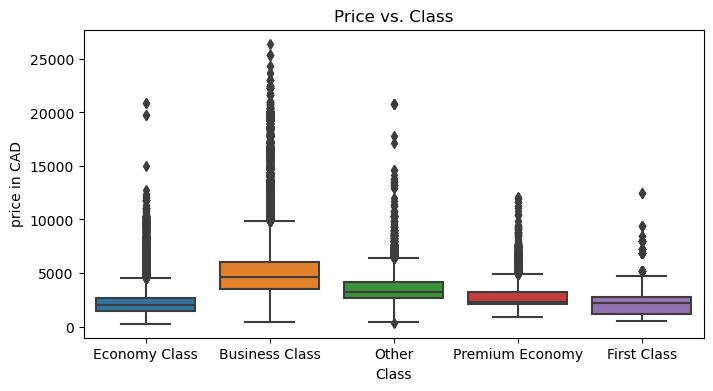

In [57]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='price in CAD', data=df)
plt.title('Price vs. Class')
plt.show()

Prices vary by source and destination, with popular or remote cities possibly having higher prices due to demand or distance.

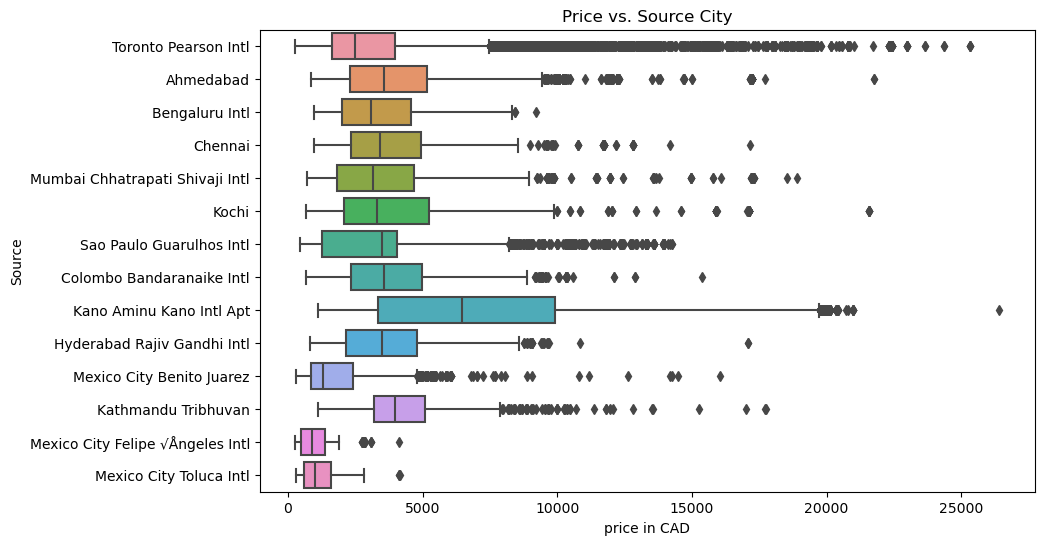

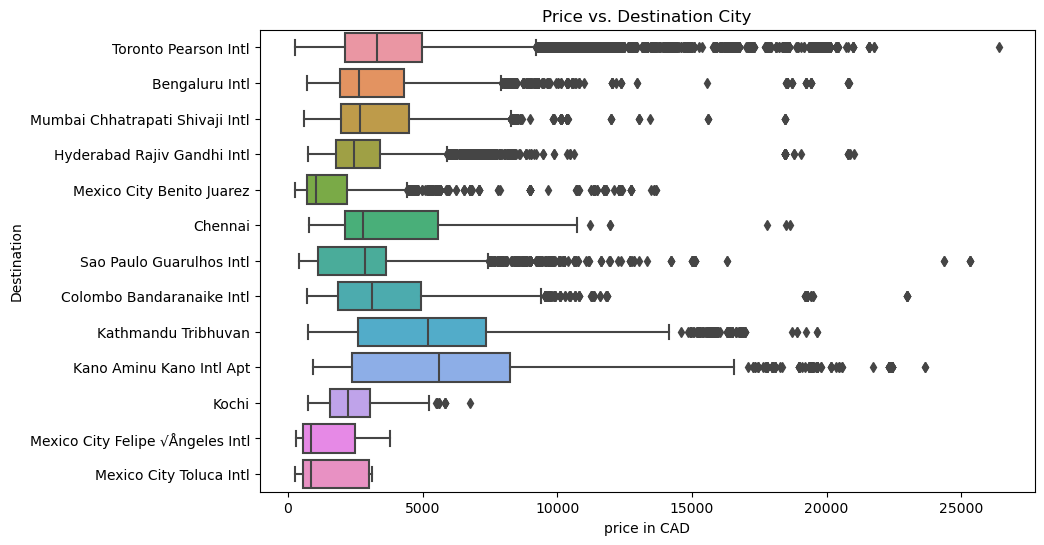

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price in CAD', y='Source', data=df, order=df['Source'].value_counts().index)
plt.title('Price vs. Source City')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='price in CAD', y='Destination', data=df, order=df['Destination'].value_counts().index)
plt.title('Price vs. Destination City')
plt.show()

Multiple Airlines has the broadest price range, indicating significant variability in their ticket prices. In contrast, Etihad Airways shows a more compact price distribution, suggesting more consistent pricing.
The median prices vary across airlines. For example, Emirates and Qatar Airways have higher median prices compared to Air Canada and United Airlines.
Multiple Airlines has several outliers on the higher end, indicating some flights are significantly more expensive than the typical range. Other airlines like Etihad Airways have no outliers, suggesting fewer extreme price variations.
The IQR, represented by the width of the boxes, shows the middle 50% of prices. A wider box, like that of Multiple Airlines, indicates greater variability in prices, while a narrower box, like that of Etihad Airways, indicates more consistent pricing.


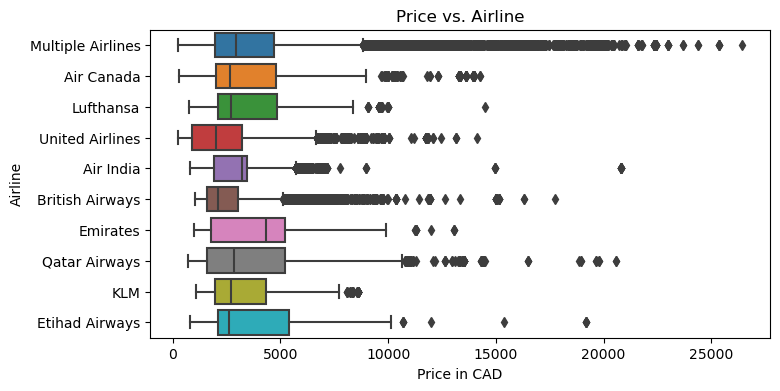

In [56]:

top_ten_airlines = df['Airline'].value_counts().head(10).index
filtered_data = df[df['Airline'].isin(top_ten_airlines)]

# Plot the box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x='price in CAD', y='Airline', data=filtered_data, order=top_ten_airlines)
plt.title('Price vs. Airline')
plt.xlabel('Price in CAD')
plt.ylabel('Airline')
plt.show()


Flights with more stops tend to have a wider range of prices. This is evident from the larger interquartile ranges and more outliers in the categories with 2 and 3 stops.
Median Prices: The median price generally increases with the number of stops. Non-stop flights (0 stops) have a lower median price compared to flights with 1, 2, or 3 stops.
Outliers: There are more outliers in the categories with 2 and 3 stops, indicating that some flights with multiple stops can be significantly more expensive than the typical range.
Price Consistency: Non-stop flights (0 stops) show a more consistent pricing pattern with fewer outliers and a smaller interquartile range, suggesting less variability in prices

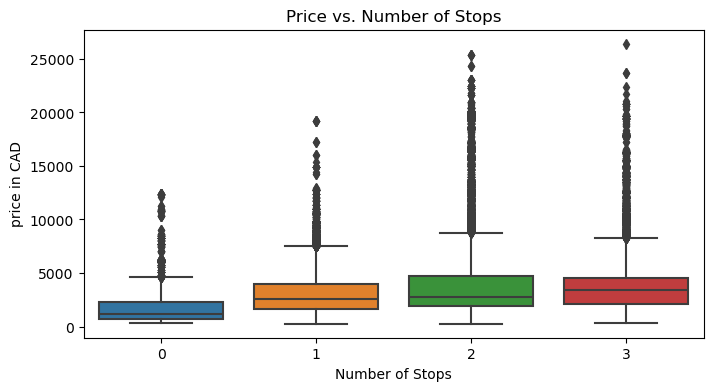

In [55]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Number of Stops', y='price in CAD', data=df)
plt.title('Price vs. Number of Stops')
plt.show()
